# Course project: Developing models for predicting absenteeism at work

**Initial analysis - To be refined before final project submission - More models to be explored**  

**Armando Cova**  



### Background

The dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work).  The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.


### Data exploration and understanding

To section explores basic characteristics of the data to gain insights into the problem studied

#### Reading data

Using Pandas to read-in the dataset `Absenteeism_at_work.csv` 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Absenteeism_at_work.csv', sep = ';')
df = data.copy()

In [3]:
# Peruse data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
# Get familiar with column names. Identify target variable and useful columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

##### Target information is contained in the column "Absenteeism time in hours"

In [5]:
# Check for missing values
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

##### There are no missing values in the dataset

#### Feature Engineering

In [6]:
# Feature understanding - Identified numerical features
numeric_cols = ['ID', 'Transportation expense', 'Distance from Residence to Work',
                'Service time','Age','Work load Average/day ','Hit target',
                'Son', 'Pet', 'Weight','Height', 'Body mass index']

# Feature understanding - Identified categorical features
categorical_cols = ['Reason for absence','Month of absence', 'Day of the week',
                    'Seasons', 'Disciplinary failure', 'Education',  
                    'Social drinker', 'Social smoker']


#### General data analysis

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

##### Look at target variable absenteeism time in hours:

In [120]:
# Total number of absenteeism hours
df[['Absenteeism time in hours']].sum()

Absenteeism time in hours    5124
dtype: int64

##### The total number of absenteeism hours was 5124

In [8]:
df[['Absenteeism time in hours']].value_counts(normalize = True).reset_index()

,Absenteeism time in hours,proportion
0,8,0.281081
1,2,0.212162
2,3,0.151351
3,1,0.118919
4,4,0.081081
5,0,0.059459
6,16,0.025676
7,24,0.021622
8,5,0.009459
9,40,0.009459


##### The majority of absences (> 75%) were a day or less

In [9]:
df[['Absenteeism time in hours']].describe()

,Absenteeism time in hours
count,740.000000
mean,6.924324
std,13.330998
min,0.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,120.000000


##### The sample average number of absenteeism hours was 6.9 hr
##### The sample STD of absences was 13.3 hr

In [10]:
# Look at the number of individuals with perfect attendance record
len(df[df['Absenteeism time in hours']==0])

44

In [11]:
len(df[df['Absenteeism time in hours']==0])/len(df)*100

5.9459459459459465

##### There were 44 individuals with perfect attendance record (6% of total)

##### By extension, 94% of individuals reported absences during the year

In [12]:
# Look at absentee data closer to develop more insights
df_absent = df[df['Absenteeism time in hours']!=0]

In [13]:
df_absent.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,696.0,17.992816,10.974723,1.000,10.00000,18.000,28.000,36.000
Reason for absence,696.0,20.392241,7.162846,1.000,14.00000,23.000,27.000,28.000
Month of absence,696.0,6.270115,3.434321,1.000,3.00000,6.000,9.000,12.000
Day of the week,696.0,3.920977,1.430728,2.000,3.00000,4.000,5.000,6.000
Seasons,696.0,2.507184,1.105880,1.000,2.00000,2.000,3.250,4.000
Transportation expense,696.0,219.916667,65.803295,118.000,179.00000,225.000,260.000,388.000
Distance from Residence to Work,696.0,29.853448,14.855615,5.000,16.00000,26.000,50.000,52.000
Service time,696.0,12.553161,4.440175,1.000,9.00000,13.000,16.000,29.000
Age,696.0,36.254310,6.380725,27.000,31.00000,37.000,40.000,58.000
Work load Average/day,696.0,271.165718,39.096003,205.917,243.65925,264.249,294.217,378.884


##### The average absence time was 7.4 hr. The STD was 13.6 hr.
##### Half of the absent workers were away for 3 hr or less
##### The maximum absence time was 120 hr (15 days)
##### The average Service time of absentees was 12.6 years with minimum of 1 and a maximum of 29 years. 75% of absentees had less than 16 years of service.
##### The mean Age of absentees was 36.3 years with a minimum of 27 years and a maximum of 58 years. 75% of absentees were younger than 40 yo
##### The average distance to work from absentees was 29.9 Km


In [14]:
# Look at the number of individuals with unjustified absences
len(df_absent[df_absent['Reason for absence']==26])

33

In [15]:
len(df_absent[df_absent['Reason for absence']==26])/len(df_absent)*100

4.741379310344827

##### There were 33 individuals with unjustified absences (5% of total)

In [16]:
df_absent['Month of absence'].value_counts()

Month of absence
3     83
2     72
7     65
10    62
5     58
11    57
8     54
4     52
6     51
12    49
1     49
9     44
Name: count, dtype: int64

In [17]:
for k in categorical_cols:
    print(df_absent[k].value_counts(normalize = True)*100,'\n')


Reason for absence
23    21.408046
28    16.091954
27     9.770115
13     7.902299
19     5.747126
22     5.459770
26     4.741379
25     4.454023
11     3.735632
10     3.591954
18     3.017241
14     2.729885
1      2.298851
7      2.155172
6      1.149425
12     1.149425
21     0.862069
8      0.862069
9      0.574713
5      0.431034
16     0.431034
24     0.431034
15     0.287356
4      0.287356
3      0.143678
2      0.143678
17     0.143678
Name: proportion, dtype: float64 

Month of absence
3     11.925287
2     10.344828
7      9.339080
10     8.908046
5      8.333333
11     8.189655
8      7.758621
4      7.471264
6      7.327586
12     7.040230
1      7.040230
9      6.321839
Name: proportion, dtype: float64 

Day of the week
2    22.126437
4    20.833333
3    20.258621
6    19.827586
5    16.954023
Name: proportion, dtype: float64 

Seasons
2    27.155172
4    25.000000
3    24.281609
1    23.563218
Name: proportion, dtype: float64 

Disciplinary failure
0    100.0
Name: pro

#### Visualizations and analyses for each of the variables

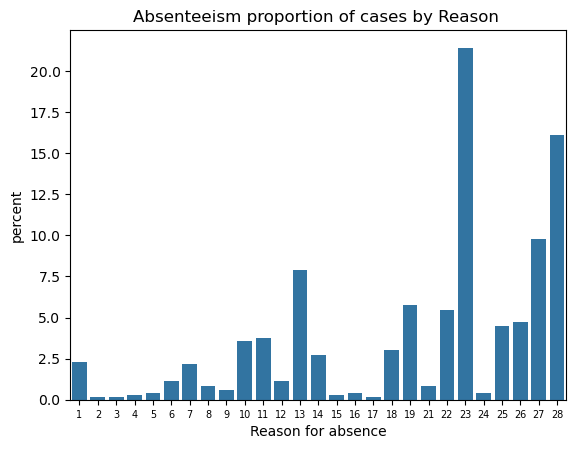

In [18]:
mpl.rcParams['xtick.labelsize'] = 7  
sns.countplot(data=df_absent, x='Reason for absence', stat='percent' )
plt.title("Absenteeism proportion of cases by Reason ")
plt.show()

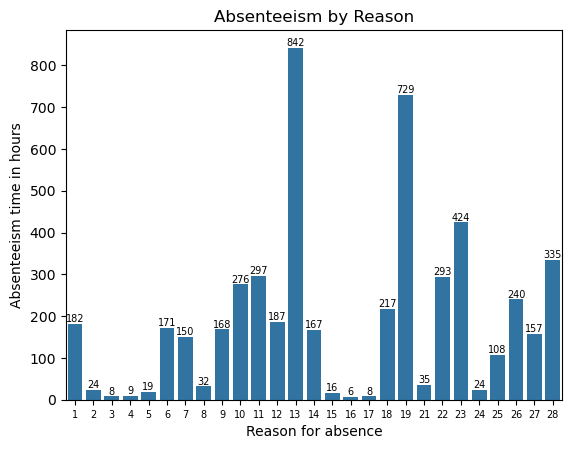

In [19]:
mpl.rcParams['xtick.labelsize'] = 7  
ax = sns.barplot(data=df_absent, x="Reason for absence", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=7)
plt.title("Absenteeism by Reason")
plt.show()

##### The main reasons for absences were medical consultation (21.4%), dental consultation (16.1%), physiotherapy(9.8%), diseases of the musculoskeletal system and connective tissue (7.9%), injuries (5.7%) and patient follow-up(5.5%)

##### The majority of absent hours were caused by diseases of the musculoskeletal system and connective tissue (842 hr); injury, poisoning and certain other consequences of external causes (729 hr); as well as medical(424 hr) and dental(335 hr) consultations. There were significant absences due to diseases of the respiratory(276 hr) and digestive(297 hr) systems. 


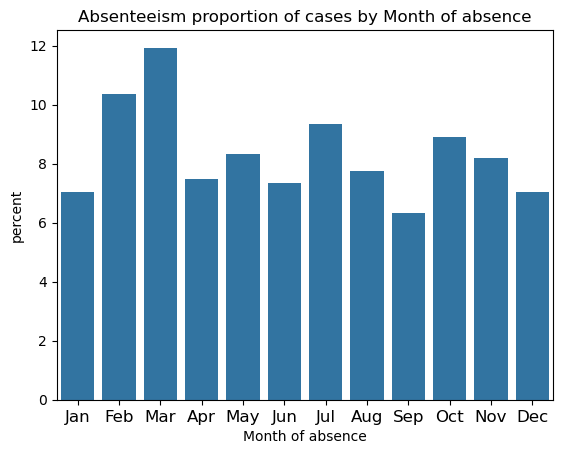

In [20]:
mpl.rcParams['xtick.labelsize'] = 12  
sns.countplot(data=df_absent, x='Month of absence', stat='percent' )
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Absenteeism proportion of cases by Month of absence")
plt.show()

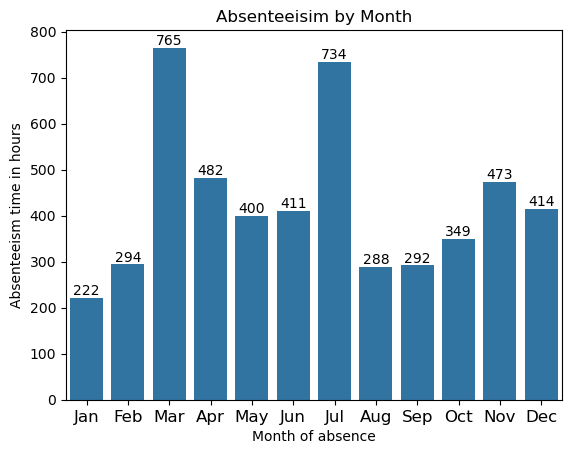

In [21]:
ax = sns.barplot(data=df_absent, x="Month of absence", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Absenteeisim by Month")
plt.show()

##### The months with the most absenteeism cases were March (12%), February (10.3%) and July (9.3%)
##### The months with the most absenteeism time were March (765 hr), July (734 hr), April (482 hr) and November (473 hr)

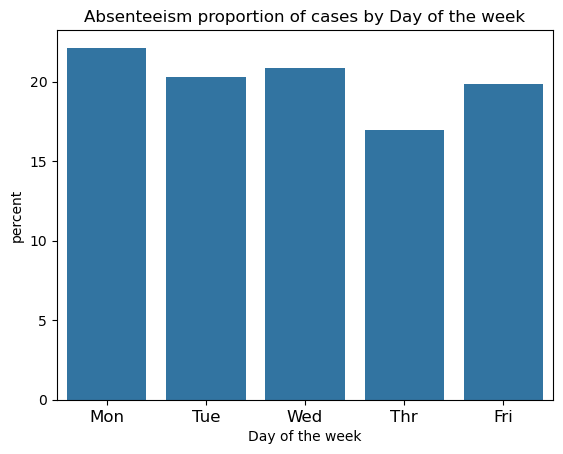

In [22]:
sns.countplot(data=df_absent, x='Day of the week', stat='percent' )
plt.xticks([0, 1, 2, 3, 4], ['Mon', 'Tue', 'Wed', 'Thr', 'Fri'])
plt.title("Absenteeism proportion of cases by Day of the week")
plt.show()

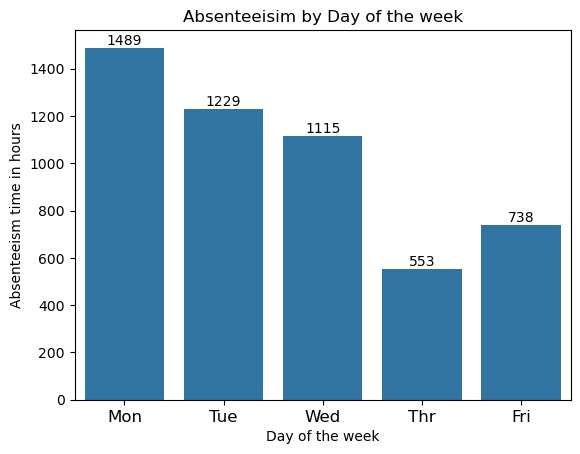

In [23]:
ax = sns.barplot(data=df_absent, x="Day of the week", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3, 4], ['Mon', 'Tue', 'Wed', 'Thr', 'Fri'])
plt.title("Absenteeisim by Day of the week")
plt.show()

##### The days with the most absence cases were Monday (22.1%), Wednesday (20.8%), Tuesday (20.3%) and Friday (19.8%) 
##### The days with the most absenteeism hours were Monday (1489 hr), Tuesday (1229 hr), Wednesday (1115 hr) and Friday (738 hr)



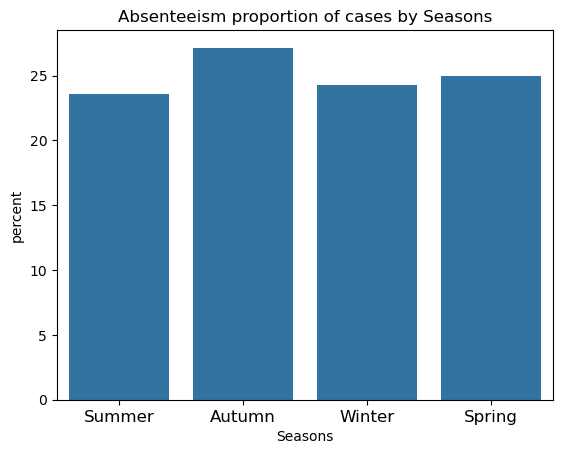

In [24]:
sns.countplot(data=df_absent, x='Seasons', stat='percent' )
plt.xticks([0, 1, 2, 3], ['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title("Absenteeism proportion of cases by Seasons")
plt.show()

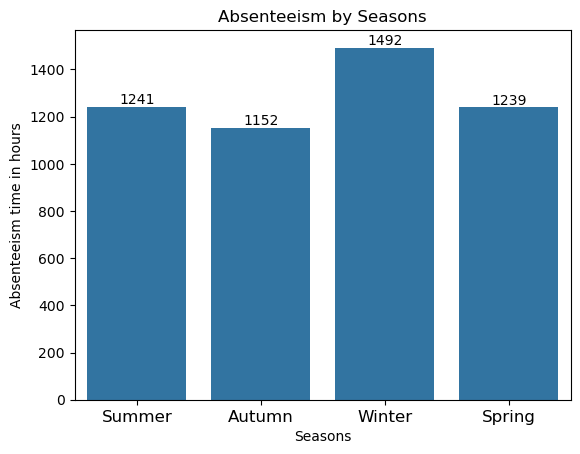

In [118]:
ax = sns.barplot(data=df_absent, x="Seasons", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3], ['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title("Absenteeism by Seasons")
plt.show()

##### Absence cases were almost equally distributed across seasons with Autumn having a slight uptick (27.2%)

##### The season with the most absenteeism hours is Autumn (1492 hr), followed by Spring (1241) and Winter (1239) which differed very little.  

##### None of the absentees were subject to disciplinary action prior to being absent

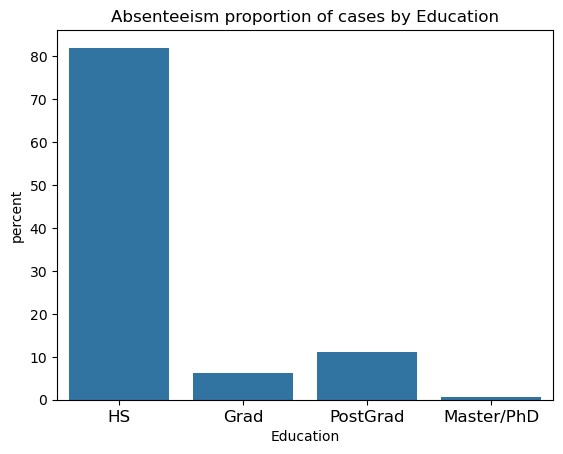

In [26]:
sns.countplot(data=df_absent, x='Education', stat='percent' )
plt.xticks([0, 1, 2, 3], ['HS', 'Grad', 'PostGrad', 'Master/PhD'])
plt.title("Absenteeism proportion of cases by Education")
plt.show()

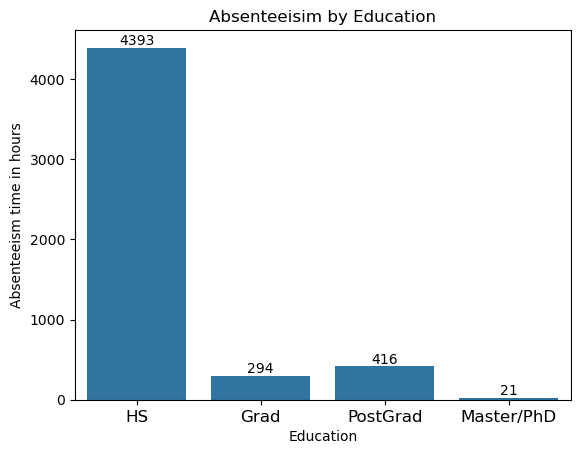

In [27]:
ax = sns.barplot(data=df_absent, x="Education", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3], ['HS', 'Grad', 'PostGrad', 'Master/PhD'])
plt.title("Absenteeisim by Education")
plt.show()

##### The majority of the absentees (82%) had high school education

##### Employees with this level of education had the most absenteeism hours (4393 hr)

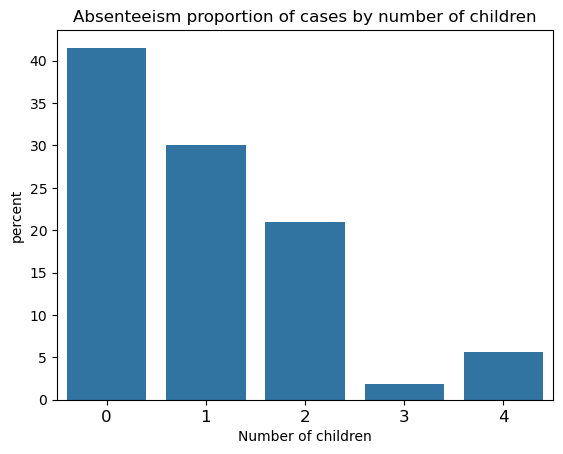

In [28]:
sns.countplot(data=df_absent, x='Son', stat='percent' )
plt.title("Absenteeism proportion of cases by number of children")
plt.xlabel('Number of children')
plt.show()

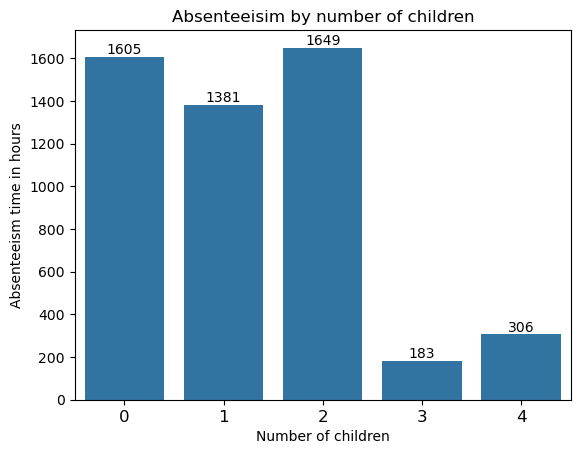

In [29]:
ax = sns.barplot(data=df_absent, x="Son", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeisim by number of children")
plt.xlabel('Number of children')
plt.show()

##### A large majority of absentees (58.5%) had children

##### The largest number of absenteeism hours were seen in employees with 2 children (1649 hr) 


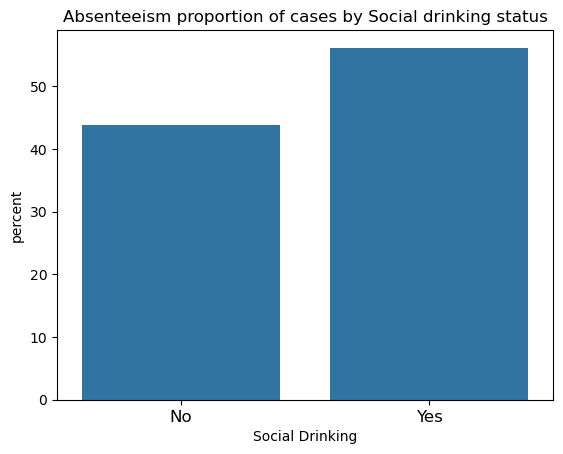

In [30]:
sns.countplot(data=df_absent, x='Social drinker', stat='percent' )
plt.title("Absenteeism proportion of cases by Social drinking status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Social Drinking')
plt.show()

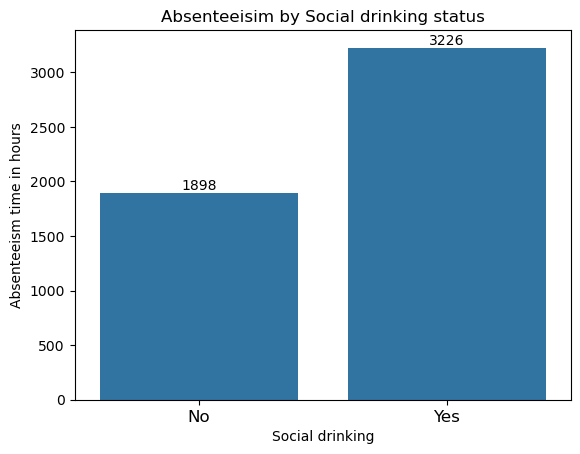

In [31]:
ax = sns.barplot(data=df_absent, x="Social drinker", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeisim by Social drinking status")
plt.xlabel('Social drinking')
plt.show()

##### 56.2 percent of absentees were social drinkers. The largest number of absenteeism hours were in the social drinker group (3226 hr)

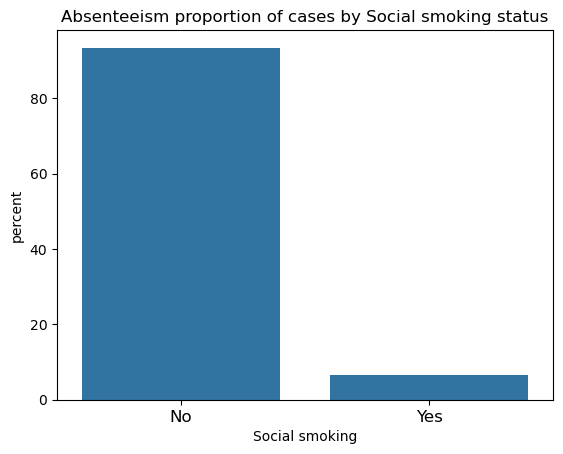

In [32]:
sns.countplot(data=df_absent, x='Social smoker', stat='percent' )
plt.title("Absenteeism proportion of cases by Social smoking status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Social smoking')
plt.show()

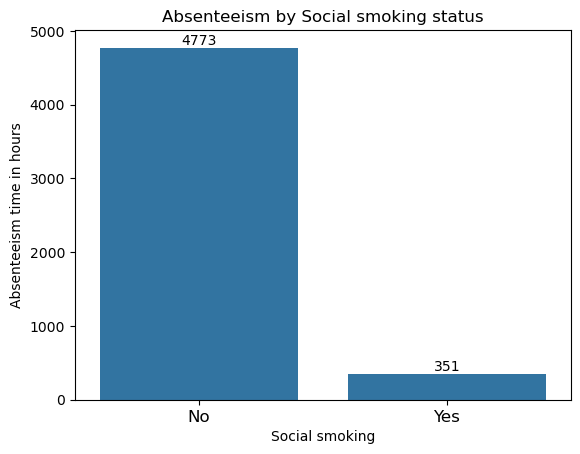

In [119]:
ax = sns.barplot(data=df_absent, x="Social smoker", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by Social smoking status")
plt.xlabel('Social smoking')
plt.show()

##### 6.6 percent of absentees were social smokers. The largest number of absenteeism hours were in the non-smoker group (4773 hr)

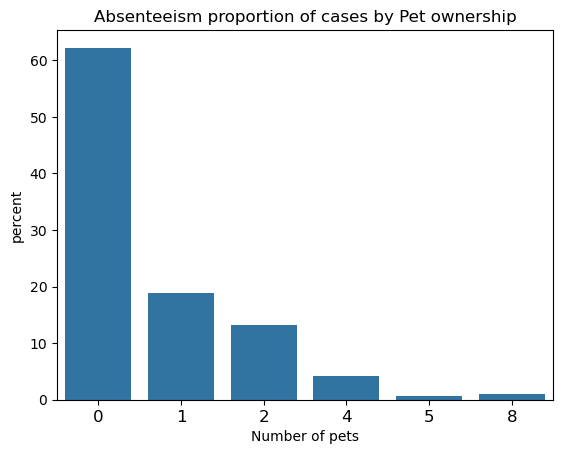

In [34]:
sns.countplot(data=df_absent, x='Pet', stat='percent' )
plt.title("Absenteeism proportion of cases by Pet ownership")
plt.xlabel('Number of pets')
plt.show()

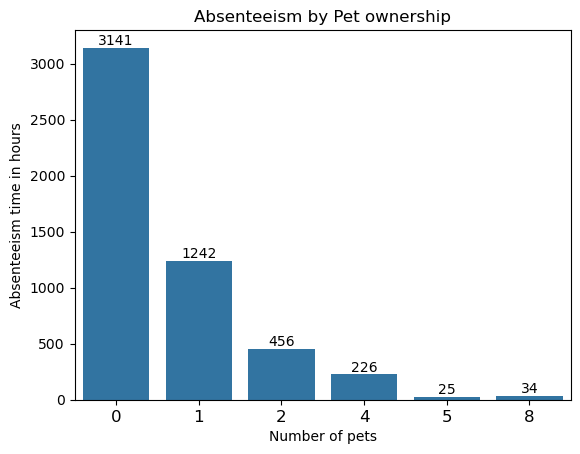

In [35]:
ax = sns.barplot(data=df_absent, x="Pet", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Pet ownership")
plt.xlabel('Number of pets')
plt.show()

##### 37.8% of absenteeism cases were found in employees who owned pets. The total number of absenteeism hours for pet owners was 1983 hr. The largest number of hours belonged to the no-pet ownership group (3141 hr)

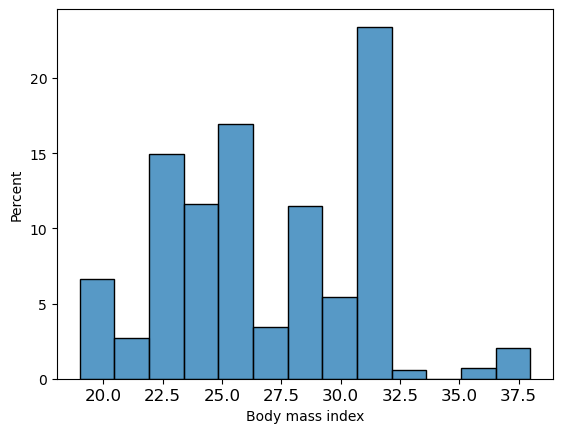

In [36]:
sns.histplot(data=df_absent, x="Body mass index", stat="percent")
plt.show()

In [37]:
# Proportion of absentees with obesity condition
(df_absent["Body mass index"] >= 30).sum()/len(df_absent)*100

32.18390804597701

In [38]:
# Proportion of absentees with overweight condition
((df_absent["Body mass index"] >= 25) & (df_absent["Body mass index"] < 30)).sum()/len(df_absent)*100

31.896551724137932

##### 31.9% of absentees were overweight and 32.2% were obese

In [39]:
df_absent['obese'] = df_absent["Body mass index"] >= 30

C:\Users\accg2\AppData\Local\Temp\ipykernel_28956\2120101704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absent['obese'] = df_absent["Body mass index"] >= 30


In [40]:
df_absent['overweight'] = (df_absent["Body mass index"] >= 25) & (df_absent["Body mass index"] < 30)

C:\Users\accg2\AppData\Local\Temp\ipykernel_28956\2105905189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_absent['overweight'] = (df_absent["Body mass index"] >= 25) & (df_absent["Body mass index"] < 30)


In [41]:
df_absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,obese,overweight
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,True,False
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,True,False
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,False,False
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,True,False
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,22,7,4,1,361,52,3,28,264.604,...,1,1,0,4,80,172,27,8,False,True
733,28,22,7,4,1,225,26,9,28,264.604,...,1,0,0,2,69,169,24,8,False,False
734,13,13,7,2,1,369,17,12,31,264.604,...,3,1,0,0,70,169,25,80,False,True
735,11,14,7,3,1,289,36,13,33,264.604,...,2,1,0,1,90,172,30,8,True,False


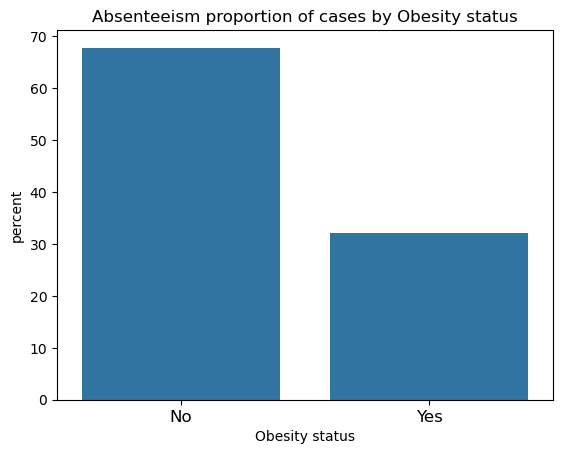

In [42]:
sns.countplot(data=df_absent, x='obese', stat='percent' )
plt.title("Absenteeism proportion of cases by Obesity status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Obesity status')
plt.show()

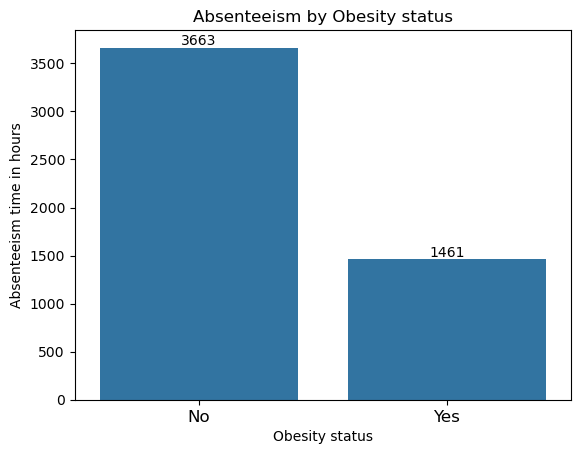

In [43]:
ax = sns.barplot(data=df_absent, x="obese", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by Obesity status")
plt.xlabel('Obesity status')
plt.show()

##### 32.2% of absenteeism cases were found in employees with obesity. The total number of absenteeism hours for these employees was 1461 hr.

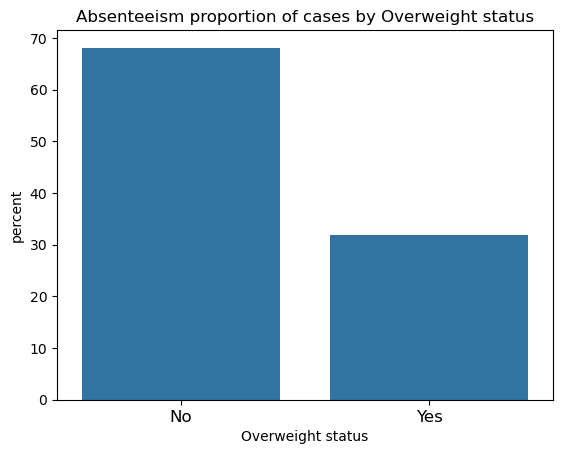

In [44]:
sns.countplot(data=df_absent, x='overweight', stat='percent' )
plt.title("Absenteeism proportion of cases by Overweight status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Overweight status')
plt.show()

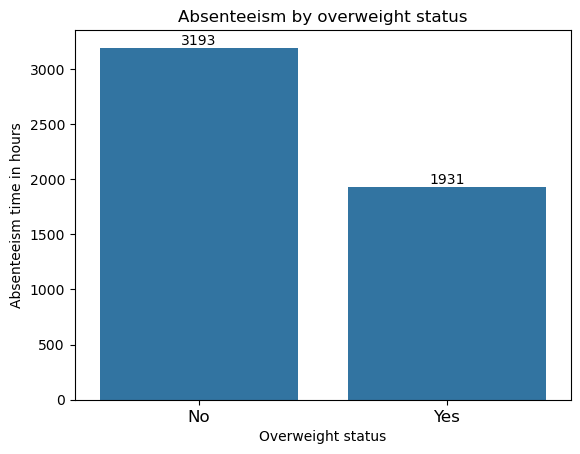

In [45]:
ax = sns.barplot(data=df_absent, x="overweight", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by overweight status")
plt.xlabel('Overweight status')
plt.show()

##### 31.9% of absenteeism cases were found in employees who were overweight. The total number of absenteeism hours for these employees was 1931 hr.

### Modeling

Develop model to predict absenteeism

In [47]:
# Import libraries to perform feature and model analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


In [48]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [49]:
# Columns to drop for selecting useful features
columns_to_drop = ['ID','Reason for absence','Month of absence', 'Day of the week',
'Seasons','Hit target', 'Disciplinary failure', 'Weight', 'Height', 'Absenteeism time in hours']


In [50]:
# Select model features for modeling before performing scaling/encoding of variables
X = df.drop(columns_to_drop, axis=1)

In [51]:
# Feature understanding - Identified numerical features for modeling
numeric_cols = ['Transportation expense', 'Distance from Residence to Work',
                'Service time','Age','Work load Average/day ', 'Body mass index']

# Feature understanding - Identified categorical features for modeling
categorical_cols = ['Education', 'Son', 'Pet', 'Social drinker', 'Social smoker']

In [52]:
# Check feature data frame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportation expense           740 non-null    int64  
 1   Distance from Residence to Work  740 non-null    int64  
 2   Service time                     740 non-null    int64  
 3   Age                              740 non-null    int64  
 4   Work load Average/day            740 non-null    float64
 5   Education                        740 non-null    int64  
 6   Son                              740 non-null    int64  
 7   Social drinker                   740 non-null    int64  
 8   Social smoker                    740 non-null    int64  
 9   Pet                              740 non-null    int64  
 10  Body mass index                  740 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 63.7 KB


In [53]:
# Summary statistics for numerical features before scaling transformation
X[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884
Body mass index,740.0,26.677027,4.285452,19.000,24.000,25.000,31.000,38.000


In [54]:
#Standardize numerical features
standard_scaler = StandardScaler()
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])
X[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Transportation expense,740.0,-9.121832e-17,1.000676,-1.544379,-0.632665,0.054856,0.577971,2.491075
Distance from Residence to Work,740.0,-3.000603e-17,1.000676,-1.661258,-0.919357,-0.244901,1.373794,1.508686
Service time,740.0,-8.161640e-17,1.000676,-2.636762,-0.811074,0.101770,0.786403,3.753146
Age,740.0,-4.272858e-16,1.000676,-1.459596,-0.841778,0.084950,0.548314,3.328497
Work load Average/day,740.0,-3.840772e-16,1.000676,-1.679999,-0.694390,-0.185522,0.582264,2.751449
Body mass index,740.0,1.128227e-16,1.000676,-1.792627,-0.625100,-0.391595,1.009438,2.643976


As expected numeric feature standardization removes the mean (mean ~= 0) and scales to unit variance


In [55]:
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,1,2,1,0,1,0.775932
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,1,1,1,0,0,1.009438
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,1,0,1,0,0,1.009438
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,1,2,1,1,0,-0.625100
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,1,2,1,0,1,0.775932


In [56]:
#Encode categorical features
X = pd.get_dummies(data = X, columns = categorical_cols)

In [57]:
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Body mass index,Education_1,Education_2,Education_3,Education_4,...,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Social drinker_0,Social drinker_1,Social smoker_0,Social smoker_1
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.775932,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,1.009438,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,1.009438,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,-0.625100,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.775932,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportation expense           740 non-null    float64
 1   Distance from Residence to Work  740 non-null    float64
 2   Service time                     740 non-null    float64
 3   Age                              740 non-null    float64
 4   Work load Average/day            740 non-null    float64
 5   Body mass index                  740 non-null    float64
 6   Education_1                      740 non-null    bool   
 7   Education_2                      740 non-null    bool   
 8   Education_3                      740 non-null    bool   
 9   Education_4                      740 non-null    bool   
 10  Son_0                            740 non-null    bool   
 11  Son_1                            740 non-null    bool   
 12  Son_2                 

In [59]:
# Extract target feature for a binary classification analysis
# Consider 4 hr or more as counting as an absence from work
y = df['Absenteeism time in hours'] > 4

In [60]:
# Label encoding
#le = LabelEncoder()
#y = le.fit_transform(y)


In [61]:
y

0      False
1      False
2      False
3      False
4      False
       ...  
735     True
736    False
737    False
738    False
739    False
Name: Absenteeism time in hours, Length: 740, dtype: bool

In [62]:
# Check if there is target class imbalance
num_yes = y.sum()
num_no = len(y) - num_yes
percentage_yes = num_yes/len(y)*100
percentage_no = num_no/len(y)*100
print('Number of Yes =', num_yes)
print('Number of No =', num_no)
print('Percentage of Yes =', percentage_yes)
print('Percentage of No =', percentage_no)



Number of Yes = 279
Number of No = 461
Percentage of Yes = 37.7027027027027
Percentage of No = 62.29729729729729


There is significant class imbalance in the data set with 62.3% on target entries being 0 ('no') and 37.7% being 1 ('yes')

### Train/Test Split

Splitting the data into a train and test set.

In [63]:
# Use stratification to address class imbalance. Generate a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### Baseline Model

Establish baseline performance using dummy classifier

In [64]:
# Establish baseline using sklearn dummy classifier
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.6216216216216216


The baseline performance that our classifier should aim to beat is an accuracy of 62.2%


### Basic Modeling with default estimator values

Employ Logistic Regression to build a basic model of absenteeism  

In [65]:
lr_default_model = LogisticRegression()
start_time = time.time()
lr_default_model.fit(X_train, y_train)
end_time = time.time()
lr_default_model_train_time = end_time - start_time


### Basic LR Model Accuracy

Compute basic LR model accuracy

In [66]:
lr_default_model_train_acc = lr_default_model.score(X_train, y_train)
lr_default_model_test_acc = lr_default_model.score(X_test, y_test)

print(f'Default LR model Training Accuracy: {lr_default_model_train_acc: .3f}')
print(f'Default LR model Test Accuracy: {lr_default_model_test_acc: .3f}')
print(f'Default LR model Train Time: {lr_default_model_train_time: .3f}')

Default LR model Training Accuracy:  0.699
Default LR model Test Accuracy:  0.680
Default LR model Train Time:  0.010


### Model Comparisons

Now, we aim to compare the performance of the basic Logistic Regression model to basic KNN algorithm, Decision Tree, and SVM models.  Will use default settings for each of the models to fit and score each. 

In [67]:
knn_default_model = KNeighborsClassifier()

start_time = time.time()
knn_default_model.fit(X_train, y_train)
end_time = time.time()
knn_default_model_train_time = end_time - start_time

knn_default_model_train_acc = knn_default_model.score(X_train, y_train)
knn_default_model_test_acc = knn_default_model.score(X_test, y_test)

print(f'Default KNN model Training Accuracy: {knn_default_model_train_acc: .3f}')
print(f'Default KNN model Test Accuracy: {knn_default_model_test_acc: .3f}')
print(f'Default KNN model Train Time: {knn_default_model_train_time: .3f}')

Default KNN model Training Accuracy:  0.780
Default KNN model Test Accuracy:  0.626
Default KNN model Train Time:  0.003


In [68]:
dtree_default_model = DecisionTreeClassifier()

start_time = time.time()
dtree_default_model.fit(X_train, y_train)
end_time = time.time()
dtree_default_model_train_time = end_time - start_time

dtree_default_model_train_acc = dtree_default_model.score(X_train, y_train)
dtree_default_model_test_acc = dtree_default_model.score(X_test, y_test)

print(f'Default DTree model Training Accuracy: {dtree_default_model_train_acc: .3f}')
print(f'Default DTree model Test Accuracy: {dtree_default_model_test_acc: .3f}')
print(f'Default DTree model Train Time: {dtree_default_model_train_time: .3f}')

Default DTree model Training Accuracy:  0.919
Default DTree model Test Accuracy:  0.653
Default DTree model Train Time:  0.003


In [69]:
svm_default_model = SVC()

start_time = time.time()
svm_default_model.fit(X_train, y_train)
end_time = time.time()
svm_default_model_train_time = end_time - start_time

svm_default_model_train_acc = svm_default_model.score(X_train, y_train)
svm_default_model_test_acc = svm_default_model.score(X_test, y_test)

print(f'Default SVM model Training Accuracy: {svm_default_model_train_acc: .3f}')
print(f'Default SVM model Test Accuracy: {svm_default_model_test_acc: .3f}')
print(f'Default SVM model Train Time: {svm_default_model_train_time: .3f}')


Default SVM model Training Accuracy:  0.747
Default SVM model Test Accuracy:  0.694
Default SVM model Train Time:  0.009


In [70]:
# Create summary pandas data frame

In [71]:
d = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Train Time': [lr_default_model_train_time, knn_default_model_train_time, dtree_default_model_train_time, svm_default_model_train_time],
     'Train Accuracy': [lr_default_model_train_acc, knn_default_model_train_acc, dtree_default_model_train_acc, svm_default_model_train_acc],
     'Test Accuracy': [lr_default_model_test_acc, knn_default_model_test_acc, dtree_default_model_test_acc, svm_default_model_test_acc]}
results_df = pd.DataFrame(data=d)
results_df.set_index('Model', inplace = True)

In [72]:
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.009974,0.698842,0.680180
KNN,0.002992,0.779923,0.626126
Decision Tree,0.002991,0.918919,0.653153
SVM,0.008976,0.747104,0.693694


The SVM basic model with default parameters had the best test accuracy, followed by the decision tree model. The LR model took the longest to compute on my system.

### Improving the Model

Options to explore
- More feature engineering and exploration
- Hyperparameter tuning and grid search 
- Adjusting performance metric

#### Hyperparameter tuning and grid search

The section below uses GridSearchCV to perform hyperparameter searches and tuning for different classification models. 

In [73]:
# Logistic regression model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
lr_model = Pipeline([("logistic", LogisticRegression(max_iter = 10000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20)   # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"]  # Optimization algorithms

# Create the parameter grid
lr_param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}

lr_grid_model = GridSearchCV(estimator=lr_model,
                          param_grid=lr_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

lr_grid_model.fit(X_train, y_train)

lr_grid_cv_results = lr_grid_model.cv_results_
lr_grid_best_params = lr_grid_model.best_params_

lr_grid_train_acc = lr_grid_model.score(X_train, y_train)
lr_grid_test_acc = lr_grid_model.score(X_test, y_test)
lr_grid_mean_fit_time = np.mean(lr_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {lr_grid_train_acc: .3f}')
print(f'Test Accuracy: {lr_grid_test_acc: .3f}')
print(f'Mean fit time: {lr_grid_mean_fit_time: .3f}')
print(f'Best parameters of LR: {lr_grid_best_params}')
#print(f'Logistic regression GSCV results: {lr_grid_cv_results}')

Training Accuracy:  0.693
Test Accuracy:  0.667
Mean fit time:  0.081
Best parameters of LR: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}


C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.

In [74]:
# Compute performance scores for accuracy optimized model
lr_val_model = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'lbfgs',max_iter = 10000)
lr_val_model.fit(X_train, y_train)
y_lr_pred = lr_val_model.predict(X_test)
lr_val_model_acc = accuracy_score(y_test, y_lr_pred)
lr_val_model_recall = recall_score(y_test, y_lr_pred)
lr_val_model_precision = precision_score(y_test, y_lr_pred)
lr_val_model_f1 = f1_score(y_test, y_lr_pred)

print(f'Optimized LR Model Accuracy: {lr_val_model_acc: .3f}')
print(f'Optimized LR Model Recall: {lr_val_model_recall: .3f}')
print(f'Optimized LR Model Precision: {lr_val_model_precision: .3f}')
print(f'Optimized LR Model F1 Score: {lr_val_model_f1: .3f}')


Optimized LR Model Accuracy:  0.667
Optimized LR Model Recall:  0.238
Optimized LR Model Precision:  0.667
Optimized LR Model F1 Score:  0.351


In [75]:
# Compute classification report
lr_val_model_classification_report = classification_report(y_test, y_lr_pred, digits=3)
print(lr_val_model_classification_report)


              precision    recall  f1-score   support

       False      0.667     0.928     0.776       138
        True      0.667     0.238     0.351        84

    accuracy                          0.667       222
   macro avg      0.667     0.583     0.563       222
weighted avg      0.667     0.667     0.615       222



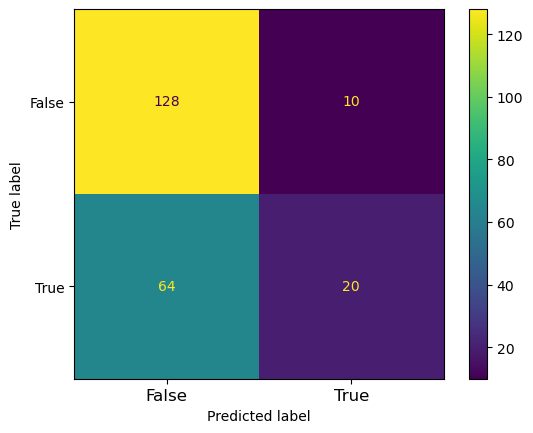

In [76]:
# Compute and display confusion matrix
cm_lr = confusion_matrix(y_test, y_lr_pred, labels=lr_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr_val_model.classes_)
disp.plot()


In [77]:
# SVM model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
svm_model = SVC()

# Define hyperparameters for tuning
C = [0.01, 0.1, 1.0, 10] # Regularization strength; inverse of regularization parameter
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

# Create the parameter grid
svm_param_grid = {"kernel" : kernel,
              "C" : C}

svm_grid_model = GridSearchCV(estimator=svm_model,
                          param_grid=svm_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

svm_grid_model.fit(X_train, y_train)

svm_grid_cv_results = svm_grid_model.cv_results_
svm_grid_best_params = svm_grid_model.best_params_

svm_grid_train_acc = svm_grid_model.score(X_train, y_train)
svm_grid_test_acc = svm_grid_model.score(X_test, y_test)
svm_grid_mean_fit_time = np.mean(svm_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {svm_grid_train_acc: .3f}')
print(f'Test Accuracy: {svm_grid_test_acc: .3f}')
print(f'Mean fit time: {svm_grid_mean_fit_time: .3f}')
print(f'Best parameters of SVM: {svm_grid_best_params}')
#print(f'SVM model GSCV results: {svm_grid_cv_results}')

Training Accuracy:  0.707
Test Accuracy:  0.694
Mean fit time:  0.016
Best parameters of SVM: {'C': 10, 'kernel': 'linear'}


In [78]:
# Compute performance scores for accuracy optimized model
svm_val_model = SVC(C = 10, kernel = 'linear')
svm_val_model.fit(X_train, y_train)
y_svm_pred = svm_val_model.predict(X_test)
svm_val_model_acc = accuracy_score(y_test, y_svm_pred)
svm_val_model_recall = recall_score(y_test, y_svm_pred)
svm_val_model_precision = precision_score(y_test, y_svm_pred)
svm_val_model_f1 = f1_score(y_test, y_svm_pred)

print(f'Optimized SVM Model Accuracy: {svm_val_model_acc: .3f}')
print(f'Optimized SVM Model Recall: {svm_val_model_recall: .3f}')
print(f'Optimized SVM Model Precision: {svm_val_model_precision: .3f}')
print(f'Optimized SVM Model F1 Score: {svm_val_model_f1: .3f}')


Optimized SVM Model Accuracy:  0.694
Optimized SVM Model Recall:  0.405
Optimized SVM Model Precision:  0.654
Optimized SVM Model F1 Score:  0.500


In [79]:
# Compute classification report
svm_val_model_classification_report = classification_report(y_test, y_svm_pred, digits=3)
print(svm_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.706     0.870     0.779       138
        True      0.654     0.405     0.500        84

    accuracy                          0.694       222
   macro avg      0.680     0.637     0.640       222
weighted avg      0.686     0.694     0.674       222



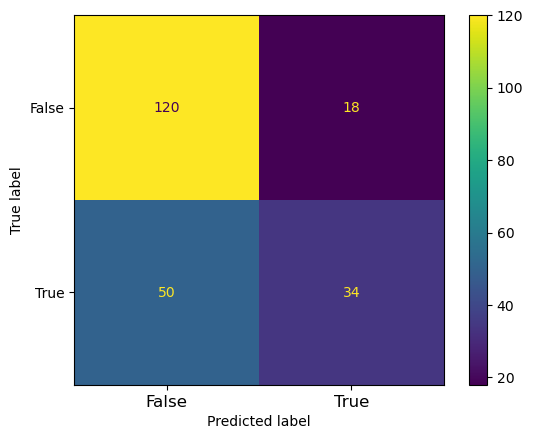

In [80]:
cm_svm = confusion_matrix(y_test, y_svm_pred, labels=svm_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm_val_model.classes_)
disp.plot()


In [81]:
# KNN model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
n_neighbors = [2, 5, 10, 20]
p = [1, 2, 3]
weight_options = ['uniform', 'distance']


# Create the parameter grid
knn_param_grid = {"n_neighbors" : n_neighbors,
              "p" : p,
              "weights":weight_options}

knn_grid_model = GridSearchCV(estimator=knn_model,
                          param_grid=knn_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

knn_grid_model.fit(X_train, y_train)

knn_grid_cv_results = knn_grid_model.cv_results_
knn_grid_best_params = knn_grid_model.best_params_

knn_grid_train_acc = knn_grid_model.score(X_train, y_train)
knn_grid_test_acc = knn_grid_model.score(X_test, y_test)
knn_grid_mean_fit_time = np.mean(knn_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {knn_grid_train_acc: .3f}')
print(f'Test Accuracy: {knn_grid_test_acc: .3f}')
print(f'Mean fit time: {knn_grid_mean_fit_time: .3f}')
print(f'Best parameters of KNN: {knn_grid_best_params}')
#print(f'KNN model GSCV results: {knn_grid_cv_results}')

Training Accuracy:  0.919
Test Accuracy:  0.676
Mean fit time:  0.003
Best parameters of KNN: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [82]:
# Compute performance scores for accuracy optimized model
knn_val_model = KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
knn_val_model.fit(X_train, y_train)
y_knn_pred = knn_val_model.predict(X_test)
knn_val_model_acc = accuracy_score(y_test, y_knn_pred)
knn_val_model_recall = recall_score(y_test, y_knn_pred)
knn_val_model_precision = precision_score(y_test, y_knn_pred)
knn_val_model_f1 = f1_score(y_test, y_knn_pred)

print(f'Optimized KNN Model Accuracy: {knn_val_model_acc: .3f}')
print(f'Optimized KNN Model Recall: {knn_val_model_recall: .3f}')
print(f'Optimized KNN Model Precision: {knn_val_model_precision: .3f}')
print(f'Optimized KNN Model F1 Score: {knn_val_model_f1: .3f}')

Optimized KNN Model Accuracy:  0.676
Optimized KNN Model Recall:  0.536
Optimized KNN Model Precision:  0.577
Optimized KNN Model F1 Score:  0.556


In [83]:
# Compute classification report
knn_val_model_classification_report = classification_report(y_test, y_knn_pred, digits=3)
print(knn_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.729     0.761     0.745       138
        True      0.577     0.536     0.556        84

    accuracy                          0.676       222
   macro avg      0.653     0.648     0.650       222
weighted avg      0.672     0.676     0.673       222



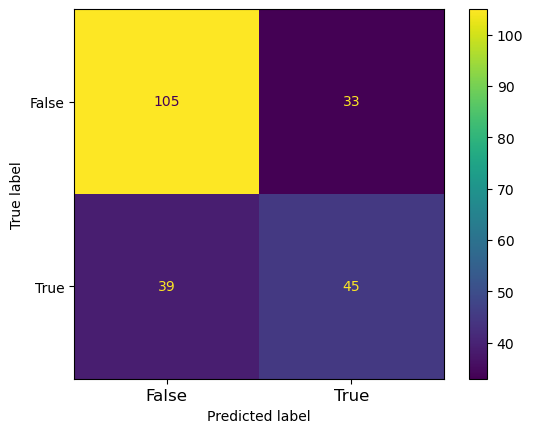

In [84]:
cm_knn = confusion_matrix(y_test, y_knn_pred, labels=knn_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn_val_model.classes_)
disp.plot()


In [85]:
# Decision tree model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
dtree_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [2, 5, 10, 15, 20, 30]
min_samples_split = [2, 3, 5]


# Create the parameter grid
dtree_param_grid = {"criterion" : criterion,
              "max_depth" : max_depth,
              "min_samples_split":min_samples_split}

dtree_grid_model = GridSearchCV(estimator=dtree_model,
                          param_grid=dtree_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

dtree_grid_model.fit(X_train, y_train)

dtree_grid_cv_results = dtree_grid_model.cv_results_
dtree_grid_best_params = dtree_grid_model.best_params_

dtree_grid_train_acc = dtree_grid_model.score(X_train, y_train)
dtree_grid_test_acc = dtree_grid_model.score(X_test, y_test)
dtree_grid_mean_fit_time = np.mean(dtree_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {dtree_grid_train_acc: .3f}')
print(f'Test Accuracy: {dtree_grid_test_acc: .3f}')
print(f'Mean fit time: {dtree_grid_mean_fit_time: .3f}')
print(f'Best parameters of tree: {dtree_grid_best_params}')
#print(f'Decision Tree model GSCV results: {dtree_grid_cv_results}')

Training Accuracy:  0.747
Test Accuracy:  0.676
Mean fit time:  0.005
Best parameters of tree: {'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 2}


In [86]:
# Compute performance scores for accuracy optimized model
dtree_val_model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3, criterion = 'log_loss')
dtree_val_model.fit(X_train, y_train)
y_dtree_pred = dtree_val_model.predict(X_test)
dtree_val_model_acc = accuracy_score(y_test, y_dtree_pred)
dtree_val_model_recall = recall_score(y_test, y_dtree_pred)
dtree_val_model_precision = precision_score(y_test, y_dtree_pred)
dtree_val_model_f1 = f1_score(y_test, y_dtree_pred)

print(f'Optimized DTree Model Accuracy: {dtree_val_model_acc: .3f}')
print(f'Optimized DTree Model Recall: {dtree_val_model_recall: .3f}')
print(f'Optimized DTree Model Precision: {dtree_val_model_precision: .3f}')
print(f'Optimized DTree Model F1 Score: {dtree_val_model_f1: .3f}')

Optimized DTree Model Accuracy:  0.676
Optimized DTree Model Recall:  0.345
Optimized DTree Model Precision:  0.630
Optimized DTree Model F1 Score:  0.446


In [87]:
# Compute classification report
dtree_val_model_classification_report = classification_report(y_test, y_dtree_pred, digits=3)
print(dtree_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.688     0.877     0.771       138
        True      0.630     0.345     0.446        84

    accuracy                          0.676       222
   macro avg      0.659     0.611     0.608       222
weighted avg      0.666     0.676     0.648       222



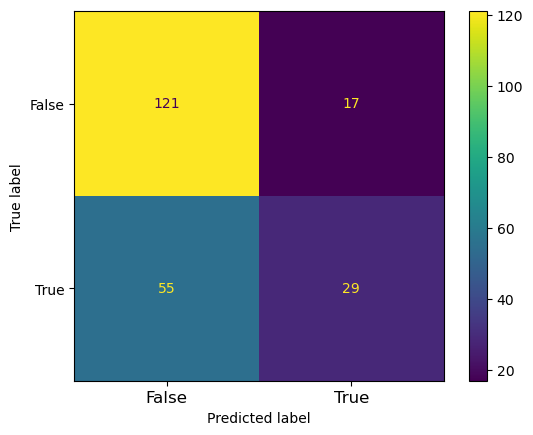

In [88]:
cm_dtree = confusion_matrix(y_test, y_dtree_pred, labels=dtree_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree,
                              display_labels=dtree_val_model.classes_)
disp.plot()

In [89]:
# Create summary pandas data frame

In [90]:
d2 = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Fit Time': [lr_grid_mean_fit_time, knn_grid_mean_fit_time, dtree_grid_mean_fit_time, svm_grid_mean_fit_time],
     'Test Accuracy': [lr_val_model_acc, knn_val_model_acc, dtree_val_model_acc, svm_val_model_acc],
     'Test Recall': [lr_val_model_recall, knn_val_model_recall, dtree_val_model_recall, svm_val_model_recall],
     'Test Precision': [lr_val_model_precision, knn_val_model_precision, dtree_val_model_precision, svm_val_model_precision],
     'Test F1': [lr_val_model_f1, knn_val_model_f1, dtree_val_model_f1, svm_val_model_f1]}
results_df2 = pd.DataFrame(data=d2)
results_df2.set_index('Model', inplace = True)




In [91]:
print('Summary model results optimized for accuracy scores')
results_df2

Summary model results optimized for accuracy scores


,Fit Time,Test Accuracy,Test Recall,Test Precision,Test F1
Model,,,,,
Logistic Regression,0.081134,0.666667,0.238095,0.666667,0.350877
KNN,0.003346,0.675676,0.535714,0.576923,0.555556
Decision Tree,0.004529,0.675676,0.345238,0.630435,0.446154
SVM,0.016311,0.693694,0.404762,0.653846,0.500000


#### Adjust performance metric 

We observed there is the opportunity for precision scores to be increased. In this section we optimize model hyperparameters for precision as an alternative metric, seeking to reduce FP numbers and increase precision scores.

In [92]:
# Logistic regression model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
lr_model = Pipeline([("logistic", LogisticRegression(max_iter = 10000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20)   # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"]  # Optimization algorithms

# Create the parameter grid
lr_param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}

lr_grid_model = GridSearchCV(estimator=lr_model,
                          param_grid=lr_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

lr_grid_model.fit(X_train, y_train)

lr_grid_cv_results = lr_grid_model.cv_results_
lr_grid_best_params = lr_grid_model.best_params_

lr_grid_train_acc = lr_grid_model.score(X_train, y_train)
lr_grid_test_acc = lr_grid_model.score(X_test, y_test)
lr_grid_mean_fit_time = np.mean(lr_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {lr_grid_train_acc: .3f}')
print(f'Test Accuracy: {lr_grid_test_acc: .3f}')
print(f'Mean fit time: {lr_grid_mean_fit_time: .3f}')
print(f'Best parameters of LR: {lr_grid_best_params}')
#print(f'Logistic regression GSCV results: {lr_grid_cv_results}')

Training Accuracy:  0.658
Test Accuracy:  0.667
Mean fit time:  0.079
Best parameters of LR: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}


C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.

In [93]:
# Compute performance scores for precision optimized model
lr_val_model = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'lbfgs',max_iter = 10000)
lr_val_model.fit(X_train, y_train)
y_lr_pred = lr_val_model.predict(X_test)
lr_val_model_acc = accuracy_score(y_test, y_lr_pred)
lr_val_model_recall = recall_score(y_test, y_lr_pred)
lr_val_model_precision = precision_score(y_test, y_lr_pred)
lr_val_model_f1 = f1_score(y_test, y_lr_pred)

print(f'Optimized LR Model Accuracy: {lr_val_model_acc: .3f}')
print(f'Optimized LR Model Recall: {lr_val_model_recall: .3f}')
print(f'Optimized LR Model Precision: {lr_val_model_precision: .3f}')
print(f'Optimized LR Model F1 Score: {lr_val_model_f1: .3f}')


Optimized LR Model Accuracy:  0.667
Optimized LR Model Recall:  0.238
Optimized LR Model Precision:  0.667
Optimized LR Model F1 Score:  0.351


In [94]:
# Compute classification report
lr_val_model_classification_report = classification_report(y_test, y_lr_pred, digits=3)
print(lr_val_model_classification_report)


              precision    recall  f1-score   support

       False      0.667     0.928     0.776       138
        True      0.667     0.238     0.351        84

    accuracy                          0.667       222
   macro avg      0.667     0.583     0.563       222
weighted avg      0.667     0.667     0.615       222



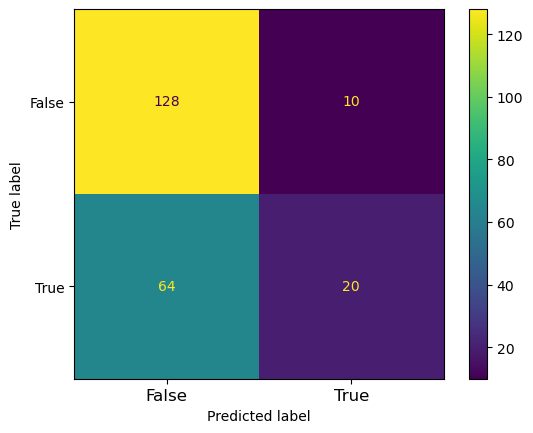

In [95]:
# Compute and display confusion matrix
cm_lr = confusion_matrix(y_test, y_lr_pred, labels=lr_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr_val_model.classes_)
disp.plot()


In [96]:
# SVM model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
svm_model = SVC()

# Define hyperparameters for tuning
C = [0.01, 0.1, 1.0, 10] # Regularization strength; inverse of regularization parameter
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

# Create the parameter grid
svm_param_grid = {"kernel" : kernel,
              "C" : C}

svm_grid_model = GridSearchCV(estimator=svm_model,
                          param_grid=svm_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

svm_grid_model.fit(X_train, y_train)

svm_grid_cv_results = svm_grid_model.cv_results_
svm_grid_best_params = svm_grid_model.best_params_

svm_grid_train_acc = svm_grid_model.score(X_train, y_train)
svm_grid_test_acc = svm_grid_model.score(X_test, y_test)
svm_grid_mean_fit_time = np.mean(svm_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {svm_grid_train_acc: .3f}')
print(f'Test Accuracy: {svm_grid_test_acc: .3f}')
print(f'Mean fit time: {svm_grid_mean_fit_time: .3f}')
print(f'Best parameters of SVM: {svm_grid_best_params}')
#print(f'SVM model GSCV results: {svm_grid_cv_results}')

Training Accuracy:  0.736
Test Accuracy:  0.700
Mean fit time:  0.015
Best parameters of SVM: {'C': 0.1, 'kernel': 'poly'}


In [97]:
# Compute performance scores for precision optimized model
svm_val_model = SVC(C = 0.1, kernel = 'poly')
svm_val_model.fit(X_train, y_train)
y_svm_pred = svm_val_model.predict(X_test)
svm_val_model_acc = accuracy_score(y_test, y_svm_pred)
svm_val_model_recall = recall_score(y_test, y_svm_pred)
svm_val_model_precision = precision_score(y_test, y_svm_pred)
svm_val_model_f1 = f1_score(y_test, y_svm_pred)

print(f'Optimized SVM Model Accuracy: {svm_val_model_acc: .3f}')
print(f'Optimized SVM Model Recall: {svm_val_model_recall: .3f}')
print(f'Optimized SVM Model Precision: {svm_val_model_precision: .3f}')
print(f'Optimized SVM Model F1 Score: {svm_val_model_f1: .3f}')


Optimized SVM Model Accuracy:  0.658
Optimized SVM Model Recall:  0.167
Optimized SVM Model Precision:  0.700
Optimized SVM Model F1 Score:  0.269


In [98]:
# Compute classification report
svm_val_model_classification_report = classification_report(y_test, y_svm_pred, digits=3)
print(svm_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.653     0.957     0.776       138
        True      0.700     0.167     0.269        84

    accuracy                          0.658       222
   macro avg      0.677     0.562     0.523       222
weighted avg      0.671     0.658     0.585       222



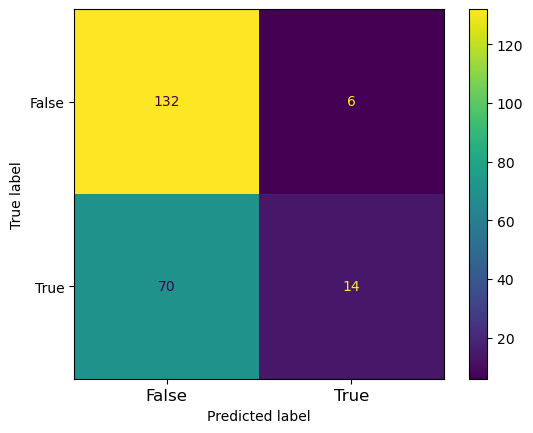

In [99]:
cm_svm = confusion_matrix(y_test, y_svm_pred, labels=svm_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm_val_model.classes_)
disp.plot()


In [100]:
# KNN model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
n_neighbors = [2, 5, 10, 20]
p = [1, 2, 3]
weight_options = ['uniform', 'distance']


# Create the parameter grid
knn_param_grid = {"n_neighbors" : n_neighbors,
              "p" : p,
              "weights":weight_options}

knn_grid_model = GridSearchCV(estimator=knn_model,
                          param_grid=knn_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

knn_grid_model.fit(X_train, y_train)

knn_grid_cv_results = knn_grid_model.cv_results_
knn_grid_best_params = knn_grid_model.best_params_

knn_grid_train_acc = knn_grid_model.score(X_train, y_train)
knn_grid_test_acc = knn_grid_model.score(X_test, y_test)
knn_grid_mean_fit_time = np.mean(knn_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {knn_grid_train_acc: .3f}')
print(f'Test Accuracy: {knn_grid_test_acc: .3f}')
print(f'Mean fit time: {knn_grid_mean_fit_time: .3f}')
print(f'Best parameters of KNN: {knn_grid_best_params}')
#print(f'KNN model GSCV results: {knn_grid_cv_results}')

Training Accuracy:  0.700
Test Accuracy:  0.711
Mean fit time:  0.003
Best parameters of KNN: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [101]:
# Compute performance scores for precision optimized model
knn_val_model = KNeighborsClassifier(n_neighbors = 10, p = 1, weights = 'uniform')
knn_val_model.fit(X_train, y_train)
y_knn_pred = knn_val_model.predict(X_test)
knn_val_model_acc = accuracy_score(y_test, y_knn_pred)
knn_val_model_recall = recall_score(y_test, y_knn_pred)
knn_val_model_precision = precision_score(y_test, y_knn_pred)
knn_val_model_f1 = f1_score(y_test, y_knn_pred)

print(f'Optimized KNN Model Accuracy: {knn_val_model_acc: .3f}')
print(f'Optimized KNN Model Recall: {knn_val_model_recall: .3f}')
print(f'Optimized KNN Model Precision: {knn_val_model_precision: .3f}')
print(f'Optimized KNN Model F1 Score: {knn_val_model_f1: .3f}')

Optimized KNN Model Accuracy:  0.694
Optimized KNN Model Recall:  0.321
Optimized KNN Model Precision:  0.711
Optimized KNN Model F1 Score:  0.443


In [102]:
# Compute classification report
knn_val_model_classification_report = classification_report(y_test, y_knn_pred, digits=3)
print(knn_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.690     0.920     0.789       138
        True      0.711     0.321     0.443        84

    accuracy                          0.694       222
   macro avg      0.700     0.621     0.616       222
weighted avg      0.698     0.694     0.658       222



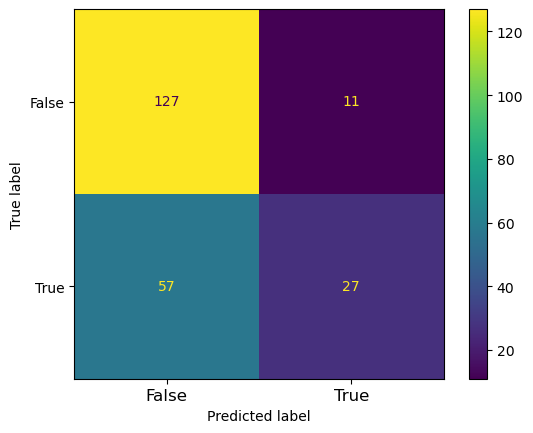

In [103]:
cm_knn = confusion_matrix(y_test, y_knn_pred, labels=knn_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn_val_model.classes_)
disp.plot()


In [104]:
# Decision tree model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
dtree_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [2, 5, 10, 15, 20]
min_samples_split = [2, 3, 5]


# Create the parameter grid
dtree_param_grid = {"criterion" : criterion,
              "max_depth" : max_depth,
              "min_samples_split":min_samples_split}

dtree_grid_model = GridSearchCV(estimator=dtree_model,
                          param_grid=dtree_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

dtree_grid_model.fit(X_train, y_train)

dtree_grid_cv_results = dtree_grid_model.cv_results_
dtree_grid_best_params = dtree_grid_model.best_params_

dtree_grid_train_acc = dtree_grid_model.score(X_train, y_train)
dtree_grid_test_acc = dtree_grid_model.score(X_test, y_test)
dtree_grid_mean_fit_time = np.mean(dtree_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {dtree_grid_train_acc: .3f}')
print(f'Test Accuracy: {dtree_grid_test_acc: .3f}')
print(f'Mean fit time: {dtree_grid_mean_fit_time: .3f}')
print(f'Best parameters of tree: {dtree_grid_best_params}')
#print(f'Decision Tree model GSCV results: {dtree_grid_cv_results}')

Training Accuracy:  0.762
Test Accuracy:  0.630
Mean fit time:  0.004
Best parameters of tree: {'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 3}


In [105]:
# Compute performance scores for precision optimized model
dtree_val_model = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, criterion = 'entropy')
dtree_val_model.fit(X_train, y_train)
y_dtree_pred = dtree_val_model.predict(X_test)
dtree_val_model_acc = accuracy_score(y_test, y_dtree_pred)
dtree_val_model_recall = recall_score(y_test, y_dtree_pred)
dtree_val_model_precision = precision_score(y_test, y_dtree_pred)
dtree_val_model_f1 = f1_score(y_test, y_dtree_pred)

print(f'Optimized DTree Model Accuracy: {dtree_val_model_acc: .3f}')
print(f'Optimized DTree Model Recall: {dtree_val_model_recall: .3f}')
print(f'Optimized DTree Model Precision: {dtree_val_model_precision: .3f}')
print(f'Optimized DTree Model F1 Score: {dtree_val_model_f1: .3f}')

Optimized DTree Model Accuracy:  0.667
Optimized DTree Model Recall:  0.202
Optimized DTree Model Precision:  0.708
Optimized DTree Model F1 Score:  0.315


In [106]:
# Compute classification report
dtree_val_model_classification_report = classification_report(y_test, y_dtree_pred, digits=3)
print(dtree_val_model_classification_report)

              precision    recall  f1-score   support

       False      0.662     0.949     0.780       138
        True      0.708     0.202     0.315        84

    accuracy                          0.667       222
   macro avg      0.685     0.576     0.547       222
weighted avg      0.679     0.667     0.604       222



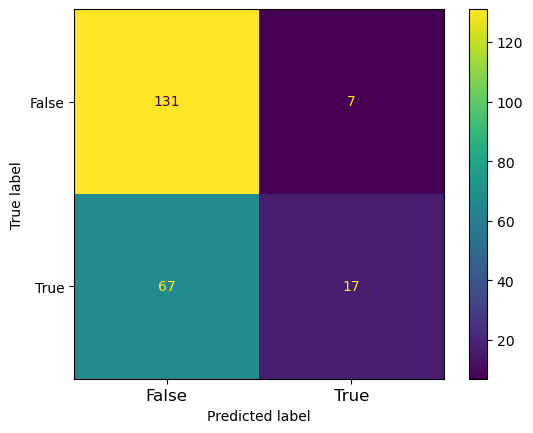

In [107]:
cm_dtree = confusion_matrix(y_test, y_dtree_pred, labels=dtree_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree,
                              display_labels=dtree_val_model.classes_)
disp.plot()

In [108]:
# Create summary pandas data frame

In [109]:
d3 = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Fit Time': [lr_grid_mean_fit_time, knn_grid_mean_fit_time, dtree_grid_mean_fit_time, svm_grid_mean_fit_time],
     'Test Accuracy': [lr_val_model_acc, knn_val_model_acc, dtree_val_model_acc, svm_val_model_acc],
     'Test Recall': [lr_val_model_recall, knn_val_model_recall, dtree_val_model_recall, svm_val_model_recall],
     'Test Precision': [lr_val_model_precision, knn_val_model_precision, dtree_val_model_precision, svm_val_model_precision],
     'Test F1': [lr_val_model_f1, knn_val_model_f1, dtree_val_model_f1, svm_val_model_f1]}
results_df3 = pd.DataFrame(data=d3)
results_df3.set_index('Model', inplace = True)




In [110]:
print('Summary model results optimized for precision scores')
results_df3

Summary model results optimized for precision scores


,Fit Time,Test Accuracy,Test Recall,Test Precision,Test F1
Model,,,,,
Logistic Regression,0.079287,0.666667,0.238095,0.666667,0.350877
KNN,0.002986,0.693694,0.321429,0.710526,0.442623
Decision Tree,0.004005,0.666667,0.202381,0.708333,0.314815
SVM,0.015101,0.657658,0.166667,0.700000,0.269231


#### Conclusion - Draft - In process of being written for final report
We have followed the main tenants of the CRISP methodology to explore the application of ML techniques to HR management. In particular we studied absenteeism using a publicly available information database created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil ([link](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)). 

We performed an exploratory data analysis of absenteeism and how it was connected to several key factors (features) in the database. A summary of main findings is given below:
* The total number of absenteeism hours was 5124.
  
* The average absence time was 7.4 hr. The STD was 13.6 hr.
  
* Half of the absent workers were away for 3 hr or less
  
* The maximum absence time was 120 hr (15 days)
  
* The average Service time of absentees was 12.6 years with minimum of 1 and a maximum of 29 years. 75% of absentees had less than 16 years of service.
  
* The mean Age of absentees was 36.3 years with a minimum of 27 years and a maximum of 58 years. 75% of absentees were younger than 40 yo
  
* The average distance from their residence location to work for absentees was 29.9 Km
    
* There were 44 individuals with perfect attendance record (6% of total)
  
* By extension, 94% of individuals reported absences during the year 

* The main reasons for absences were medical consultation (21.4%), dental consultation (16.1%), physiotherapy(9.8%), diseases of the musculoskeletal system and connective tissue (7.9%), injuries (5.7%) and patient follow-up(5.5%)

* The majority of absent hours were caused by diseases of the musculoskeletal system and connective tissue (842 hr); injury, poisoning and certain other consequences of external causes (729 hr); as well as medical(424 hr) and dental(335 hr) consultations. There were significant absences due to diseases of the respiratory(276 hr) and digestive(297 hr) systems.

* The months with the most absenteeism cases were March (12%), February (10.3%) and July (9.3%)
  
* The months with the most absenteeism time were March (765 hr), July (734 hr), April (482 hr) and November (473 hr)
  
* The days with the most absence cases were Monday (22.1%), Wednesday (20.8%), Tuesday (20.3%) and Friday (19.8%)
  
* The days with the most absenteeism hours were Monday (1489 hr), Tuesday (1229 hr), Wednesday (1115 hr) and Friday (738 hr)
  
* Absence cases were almost equally distributed across seasons with Autumn having a slight uptick (27.2%)
  
* The season with the most absenteeism hours was Autumn (1492 hr), followed by Spring (1241) and Winter (1239) which differed very little.

* None of the absentees were subject to disciplinary action prior to being absent
  
* The majority of the absentees (82%) had high school education

* Employees with this level of education had the most absenteeism hours (4393 hr)

* large majority of absentees (58.5%) had children

* The largest number of absenteeism hours were seen in employees with 2 children (1649 hr)
  
* 56.2 percent of absentees were social drinkers. The largest number of absenteeism hours were in the social drinker group (3226 hr)
  
* 6.6 percent of absentees were social smokers. The largest number of absenteeism hours were in the non-smoker group (4773 hr)
  
* 37.8% of absenteeism cases were found in employees who owned pets. The total number of absenteeism hours for pet owners was 1983 hr. The largest number of hours belonged to the no-pet ownership group (3141 hr)
  
* 37.8% of absenteeism cases were found in employees who owned pets. The total number of absenteeism hours for pet owners was 1983 hr. The largest number of hours belonged to the no-pet ownership group (3141 hr)
  
* 32.2% of absenteeism cases were found in employees with obesity. The total number of absenteeism hours for these employees was 1461 hr
  
* 31.9% of absenteeism cases were found in employees who were overweight. The total number of absenteeism hours for these employees was 1931 hr.
  
Following this statistical analysis we proceeded to model absenteeism in an attempt to develop a tool for predicting employee absences. For this purpose we framed the modeling as a binary classification problem that captured the influence of significant absenteeism events, considered as such when the employee absence time was > 4 Hr.  We employed a variety of known classification methods (KNN, Decision Tree, Logistic Regression, SVM, etc) and compared their predictive performance on test data sets. The performance metrics used were accuracy, precision, recall and F1 scores. Hyperparameter searches on the different estimators were carried out in an attempt to optimize performance for accuracy and precision scores. The best performing models were SVM and KNN (details in the analysis notebook attached)
